In [3]:
import pandas as pd
import numpy as np
from matplotlib import font_manager, rc 
import matplotlib.pyplot as plt
import matplotlib as mpl

#마이너스 표시
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

# 데이터
* 서울시 생필품 농수축산물 가격 정보

In [4]:
df = pd.read_csv('./data2/생필품 농수축산물 가격 정보(2021년1월_6월).csv',
                 encoding='cp949')
df.head()

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
0,1673336,2,신세계백화점,133,무(세척무),1개,2980,2021-06,"국내산,세척무",2,대형마트,140000,중구,2021-06-24
1,1667985,228,방배종합시장,23,상추,1봉150g,1500,2021-06,국내산,1,전통시장,650000,서초구,2021-06-24
2,1666935,1,통인시장,266,"고등어(생물,국산)",1마리,4000,2021-06,"국내산,생물",1,전통시장,110000,종로구,2021-06-24
3,1671116,25,방학동도깨비시장,268,"고등어(냉동,국산)",350g,2500,2021-06,국내산,1,전통시장,320000,도봉구,2021-06-24
4,1667066,6,이마트 용산점,171,달걀(10개),15구,5980,2021-06,낭이생생대란,2,대형마트,170000,용산구,2021-06-24


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42699 entries, 0 to 42698
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   일련번호               42699 non-null  int64 
 1   시장/마트 번호           42699 non-null  int64 
 2   시장/마트 이름           42699 non-null  object
 3   품목 번호              42699 non-null  int64 
 4   품목 이름              42699 non-null  object
 5   실판매규격              42699 non-null  object
 6   가격(원)              42699 non-null  int64 
 7   년도-월               42699 non-null  object
 8   비고                 42425 non-null  object
 9   시장유형 구분(시장/마트) 코드  42699 non-null  int64 
 10  시장유형 구분(시장/마트) 이름  42699 non-null  object
 11  자치구 코드             42699 non-null  int64 
 12  자치구 이름             42699 non-null  object
 13  점검일자               42699 non-null  object
dtypes: int64(6), object(8)
memory usage: 4.6+ MB


In [8]:
df.isnull().sum()

일련번호                   0
시장/마트 번호               0
시장/마트 이름               0
품목 번호                  0
품목 이름                  0
실판매규격                  0
가격(원)                  0
년도-월                   0
비고                   274
시장유형 구분(시장/마트) 코드      0
시장유형 구분(시장/마트) 이름      0
자치구 코드                 0
자치구 이름                 0
점검일자                   0
dtype: int64

## 데이터 확인

In [12]:
df['시장/마트 번호'].nunique()

102

In [13]:
df['시장/마트 번호'].unique()

array([  2, 228,   1,  25,   6,  10,  51, 207,  32, 109,  22,  16,  56,
        42,  86,  38,  20,  40,  62,  85,  82,  98,  88,  21,  90,  84,
        63,  80,  68,  78,  66, 100,  72,  31, 133, 102, 103,  74, 200,
       120, 145, 218, 130, 127, 121,  27,  96,  94,  60,  75,  28,  44,
       108,  53,  73,  45, 212,  33, 223, 129, 219, 115,  55,  19,  11,
       140, 114, 210, 224, 110,  26, 147, 214, 148,  49, 116, 151,  92,
       221, 205, 123, 216, 134,  13, 215, 135, 136, 213,   8, 146,  14,
       220,  15, 153, 154, 199, 222,  91, 206, 227, 225, 226], dtype=int64)

In [15]:
df['시장/마트 이름'].nunique(), df['시장/마트 이름'].unique()

(102,
 array(['신세계백화점', '방배종합시장', '통인시장', '방학동도깨비시장', '이마트 용산점', '용문시장',
        'NC백화점 불광점', '관악신사시장(신림4동)', '영천시장', '고척근린시장', '이마트 여의도점',
        '현대백화점 미아점', '롯데백화점', '이마트 가양점', '홈플러스 동대문점', '송화시장', '영등포전통시장',
        '홈플러스 등촌점', '후암시장', '경동시장', '롯데마트 강변점', '롯데백화점 노원점', '롯데백화점 청량리점',
        '홈플러스 영등포점', '우림시장', '청량리종합시장', '농협 하나로마트 용산점', '이마트 자양점',
        '롯데백화점 미아점', '자양골목시장', '수유재래시장', '홈플러스 중계점', '금남시장', '인왕시장',
        '원당종합시장', '목3동시장', '신영시장', '이마트 왕십리점', '뉴코아아울렛 강남점', '망원시장',
        '마천중앙시장', '신세계백화점 강남점', '롯데백화점 영등포점', '남성시장', '마포농수산물시장',
        '이마트 창동점', '공릉동 도깨비시장', '홈플러스 면목점', '이마트 청계점', '이마트 성수점',
        '홈플러스 방학점', '이마트 역삼점', '남구로시장', '이마트 은평점', '뚝도시장', '롯데백화점 강남점',
        '노룬산골목시장', '현대백화점 신촌점', '홈플러스 목동점', '태평백화점', '대조시장', '남문시장',
        '광장시장', '대림중앙시장', '남대문시장', '하나로클럽 양재점', '현대시장', '상계중앙시장',
        '농협하나로마트 신촌점', '이마트 신도림점', '신창시장', '롯데백화점 잠실점', '이마트 목동점',
        '홈플러스 잠실점', '대림시장', '홈플러스 시흥점', '암사종합시장', '이마트 상봉점', '숭인시장',
        '둔촌역전통시장', '홈플러스 월드컵점', 

In [18]:
# 시장/마트 목록
df_market = df[['시장/마트 번호','시장/마트 이름','자치구 이름', 
    '시장유형 구분(시장/마트) 이름']].drop_duplicates()
df_market

,시장/마트 번호,시장/마트 이름,자치구 이름,시장유형 구분(시장/마트) 이름
0,2,신세계백화점,중구,대형마트
1,228,방배종합시장,서초구,전통시장
2,1,통인시장,종로구,전통시장
3,25,방학동도깨비시장,도봉구,전통시장
4,6,이마트 용산점,용산구,대형마트
...,...,...,...,...
5339,91,동원시장,중랑구,전통시장
5341,206,하나로클럽 미아점,강북구,대형마트
6609,227,NC백화점 신구로점,구로구,대형마트
21043,225,이마트 에브리데이 창동점,도봉구,대형마트


In [19]:
# 자치구별 시장/마트 개수
df_market['자치구 이름'].value_counts()

중구      6
도봉구     5
관악구     5
구로구     5
영등포구    5
노원구     4
금천구     4
강남구     4
송파구     4
마포구     4
양천구     4
성동구     4
강북구     4
중랑구     4
동대문구    4
광진구     4
서초구     4
강서구     4
성북구     4
서대문구    4
은평구     4
용산구     4
강동구     4
동작구     2
종로구     2
Name: 자치구 이름, dtype: int64

In [20]:
# 자치구 이름으로 시장/마트 확인
df_market[df_market['자치구 이름']=='중구']

,시장/마트 번호,시장/마트 이름,자치구 이름,시장유형 구분(시장/마트) 이름
0,2,신세계백화점,중구,대형마트
21,56,롯데백화점,중구,대형마트
257,60,이마트 청계점,중구,대형마트
576,11,남대문시장,중구,전통시장
3799,8,롯데마트 서울역점,중구,대형마트
4920,199,서울중앙시장,중구,전통시장


In [25]:
# 품목 목록
df_items = df[['품목 번호','품목 이름']].drop_duplicates()
df_items[:30]

,품목 번호,품목 이름
0,133,무(세척무)
1,23,상추
2,266,"고등어(생물,국산)"
3,268,"고등어(냉동,국산)"
4,171,달걀(10개)
5,22,오이
6,312,애호박
7,24,양파
8,58,"쇠고기(한우,불고기)"
9,307,배추(2.5~3kg)


In [26]:
df_items[30:60]

,품목 번호,품목 이름
54,264,"명태(냉동,수입산)"
56,276,배(신고)
58,28,사과
79,25,무
97,278,쇠고기
103,308,무(1kg)
114,259,"조기(냉동,국산)"
135,304,고등어
157,27,배
177,260,"조기(냉동,수입산)"


In [27]:
df_items[60:90]

,품목 번호,품목 이름
1550,318,"고등어(30cm,수입산)"
1820,284,배(중품)
1898,118,"호박(인큐베이터),중간"
2191,272,양파(작은망)
2432,274,"무(세척무, 중)"
2457,265,"명태(생물,수입산)"
2466,175,배추(중간)
2567,255,"오징어(생물,수입산)"
2620,54,오징어(냉동)
3706,313,"냉동참조기(20cm,수입)"


In [29]:
# 자치구 목록
df_gu = df[['자치구 코드','자치구 이름']].drop_duplicates()
df_gu

,자치구 코드,자치구 이름
0,140000,중구
1,650000,서초구
2,110000,종로구
3,320000,도봉구
4,170000,용산구
7,380000,은평구
9,620000,관악구
13,410000,서대문구
15,530000,구로구
17,560000,영등포구


In [31]:
df_gu.shape

(25, 2)

In [33]:
# 시장 유형
df[['시장유형 구분(시장/마트) 코드','시장유형 구분(시장/마트) 이름']].drop_duplicates()

,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름
0,2,대형마트
1,1,전통시장


## 삼겹살 가격 분석

In [36]:
# 품목 이름 중에서 삼겹살이 포함된 행 가져오기
# 2021년 2021-06 데이터
# 600g 인것
df.head()

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
0,1673336,2,신세계백화점,133,무(세척무),1개,2980,2021-06,"국내산,세척무",2,대형마트,140000,중구,2021-06-24
1,1667985,228,방배종합시장,23,상추,1봉150g,1500,2021-06,국내산,1,전통시장,650000,서초구,2021-06-24
2,1666935,1,통인시장,266,"고등어(생물,국산)",1마리,4000,2021-06,"국내산,생물",1,전통시장,110000,종로구,2021-06-24
3,1671116,25,방학동도깨비시장,268,"고등어(냉동,국산)",350g,2500,2021-06,국내산,1,전통시장,320000,도봉구,2021-06-24
4,1667066,6,이마트 용산점,171,달걀(10개),15구,5980,2021-06,낭이생생대란,2,대형마트,170000,용산구,2021-06-24


In [40]:
# 특정 문자열이 포함되어 있는지 확인.str.contains(문자열)

df_sam=df[(df['품목 이름'].str.contains('삼겹살'))&
          (df['년도-월']=='2021-06')&
          (df['실판매규격'].str.contains('600g'))]
df_sam.head()

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
22,1668431,16,현대백화점 미아점,202,돼지고기(생삼겹살),"600g (100g 4,280원)",25680,2021-06,선진포크,2,대형마트,290000,성북구,2021-06-24
47,1670116,98,롯데백화점 노원점,99,돼지고기(생삼겹살),600g,26940,2021-06,한돈,2,대형마트,350000,노원구,2021-06-24
76,1674090,42,이마트 가양점,99,돼지고기(생삼겹살),600g,15480,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
86,1668834,42,이마트 가양점,99,돼지고기(생삼겹살),600g,14880,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
146,1667684,42,이마트 가양점,99,돼지고기(생삼겹살),600g,14880,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24


In [41]:
df_sam.shape

(224, 14)

In [44]:
# 가격의 평균 
# 최대값
# 조건 : 5000원 이하인 시장/마트이름
# 최저가
df_sam.head()

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
22,1668431,16,현대백화점 미아점,202,돼지고기(생삼겹살),"600g (100g 4,280원)",25680,2021-06,선진포크,2,대형마트,290000,성북구,2021-06-24
47,1670116,98,롯데백화점 노원점,99,돼지고기(생삼겹살),600g,26940,2021-06,한돈,2,대형마트,350000,노원구,2021-06-24
76,1674090,42,이마트 가양점,99,돼지고기(생삼겹살),600g,15480,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
86,1668834,42,이마트 가양점,99,돼지고기(생삼겹살),600g,14880,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24
146,1667684,42,이마트 가양점,99,돼지고기(생삼겹살),600g,14880,2021-06,"국내산,생삼겹살",2,대형마트,500000,강서구,2021-06-24


In [46]:
# 가격의 평균 
df_sam['가격(원)'].mean()

16842.723214285714

In [47]:
# 최대값
df_sam['가격(원)'].max()

35890

In [51]:
# 조건 : 5000원 이하인 시장/마트이름
df_sam[df_sam['가격(원)']<=5000]['시장/마트 이름']

3645     이마트 창동점
4052    홈플러스 방학점
Name: 시장/마트 이름, dtype: object

In [52]:
# 최저가
df_sam['가격(원)'].min()

1690

## 우리동네 삼겹살 가격

In [56]:
gu = input('구이름 : ')
df_sam_gu = df_sam[df_sam['자치구 이름'] == gu ][['시장/마트 이름','품목 이름',
                                '실판매규격','가격(원)']].drop_duplicates()
df_sam_gu

구이름 : 마포구


,시장/마트 이름,품목 이름,실판매규격,가격(원)
1904,망원시장,돼지고기(생삼겹살),600g,13600
2196,마포농수산물시장,돼지고기(생삼겹살),600g,17700
2267,마포농수산물시장,돼지고기(생삼겹살),600g,17600
2389,홈플러스 월드컵점,돼지고기(생삼겹살),600g,15540
6222,농협하나로마트 신촌점,돼지고기(생삼겹살),600g,14600
6231,농협하나로마트 신촌점,돼지고기(생삼겹살),600g,14340


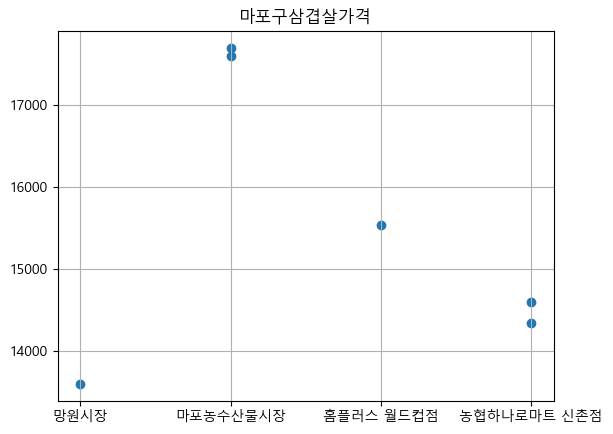

In [57]:
# 시각화
x = df_sam_gu['시장/마트 이름']
y = df_sam_gu['가격(원)']
plt.scatter(x, y)
plt.title(gu + '삼겹살가격')
plt.grid()
plt.show()

## 마트 지점별 삼겹살 가격

In [79]:
mart = input('시장/마트이름:') # 입력 백화점

시장/마트이름:백화점


In [60]:
# 마트 지점별 삼겹살 가격
# 시장/마트 이름	품목 이름	실판매규격	가격(원)
# 시각화

In [80]:
df_sam_mart = df_sam[df_sam['시장/마트 이름'].str.contains(mart)][['시장/마트 이름','품목 이름',
                                '실판매규격','가격(원)']].drop_duplicates()

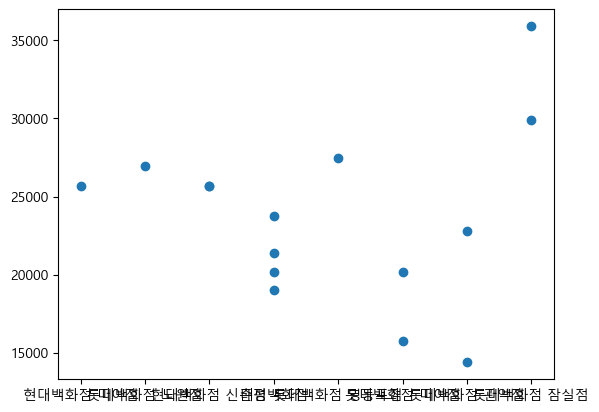

In [81]:
plt.scatter(df_sam_mart['시장/마트 이름'], df_sam_mart['가격(원)'])

## 달걀 분석
* 21년 6월 데이터
* 규격 : 30개짜리 기준 데이터 프레임만들기
* 30개 평균 가격, 최대 가격, 최소 가격, 6000원 이하 어디인지
* 동네 입력받아서 달걀가격 확인, 백화점 지점별 달걀 가격

In [82]:
df.head()

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
0,1673336,2,신세계백화점,133,무(세척무),1개,2980,2021-06,"국내산,세척무",2,대형마트,140000,중구,2021-06-24
1,1667985,228,방배종합시장,23,상추,1봉150g,1500,2021-06,국내산,1,전통시장,650000,서초구,2021-06-24
2,1666935,1,통인시장,266,"고등어(생물,국산)",1마리,4000,2021-06,"국내산,생물",1,전통시장,110000,종로구,2021-06-24
3,1671116,25,방학동도깨비시장,268,"고등어(냉동,국산)",350g,2500,2021-06,국내산,1,전통시장,320000,도봉구,2021-06-24
4,1667066,6,이마트 용산점,171,달걀(10개),15구,5980,2021-06,낭이생생대란,2,대형마트,170000,용산구,2021-06-24


In [100]:
df_egg = df[(df['년도-월']=='2021-06')&
            (df['품목 이름'].str.contains('달걀'))&
            (df['실판매규격'].str.contains('30개'))]
df_egg.head()

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
28,1668434,16,현대백화점 미아점,320,달걀(30개),30개,0,2021-06,입고안됨,2,대형마트,290000,성북구,2021-06-24
43,1670908,82,롯데마트 강변점,320,달걀(30개),30개,10800,2021-06,1등급란.특란,2,대형마트,215000,광진구,2021-06-24
52,1667084,10,용문시장,320,달걀(30개),30개,10500,2021-06,건강영양란,1,전통시장,170000,용산구,2021-06-24
62,1671401,42,이마트 가양점,320,달걀(30개),30개(1800g),6900,2021-06,"국내산,특란",2,대형마트,500000,강서구,2021-06-24
75,1667237,82,롯데마트 강변점,320,달걀(30개),30개,10800,2021-06,1등급란.특란,2,대형마트,215000,광진구,2021-06-24


In [101]:
df_egg['가격(원)'].mean(), df_egg['가격(원)'].max(), df_egg['가격(원)'].min()

(9084.895899053628, 75000, 0)

In [108]:
df_egg[df_egg['가격(원)']<=6000][['시장/마트 이름']].drop_duplicates()

,시장/마트 이름
28,현대백화점 미아점
1139,롯데백화점 청량리점
1477,이마트 성수점
3953,롯데백화점 잠실점


In [109]:
# * 동네 입력받아서 달걀가격 확인, 백화점 지점별 달걀 가격

In [118]:
gu = input('동네 입력 : ')

동네 입력 : 마포구


In [124]:
df_egg_gu = df_egg[df_egg['자치구 이름']==gu][['시장/마트 이름','품목 이름',
                                '실판매규격','가격(원)']].drop_duplicates()
df_egg_gu

,시장/마트 이름,품목 이름,실판매규격,가격(원)
199,망원시장,달걀(30개),30개,8500
1923,홈플러스 월드컵점,달걀(30개),30개,7950
1958,망원시장,달걀(30개),30개(1.5kg),9300
2229,마포농수산물시장,달걀(30개),30개,7800
2245,마포농수산물시장,달걀(30개),30개(1.5kg),8000
2248,마포농수산물시장,달걀(30개),30개,8300
2273,마포농수산물시장,달걀(30개),30개(1.5kg),8800
2383,홈플러스 월드컵점,달걀(30개),30개,6950
2421,홈플러스 월드컵점,달걀(30개),30개(1.5kg),6900
2428,홈플러스 월드컵점,달걀(30개),30개(1.5kg),12840


<Axes: xlabel='시장/마트 이름', ylabel='가격(원)'>

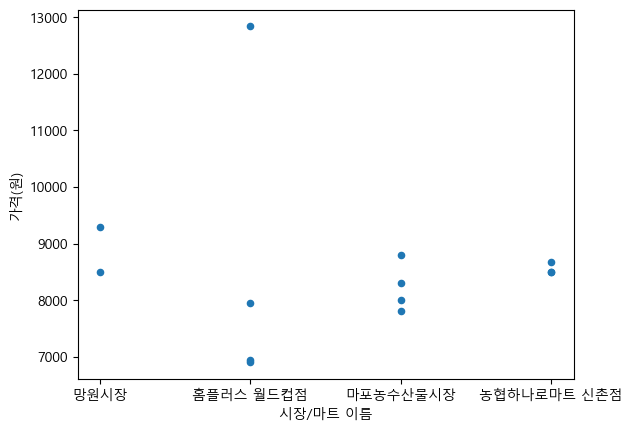

In [127]:
df_egg_gu
df_egg_gu.plot(x='시장/마트 이름', y='가격(원)', kind='scatter')

In [128]:
mart = input('시장/마트이름:') # 입력 백화점

시장/마트이름:백화점


In [131]:
df_egg_mart = df_egg[df_egg['시장/마트 이름'].str.contains(mart)][['시장/마트 이름','품목 이름',
                                '실판매규격','가격(원)']].drop_duplicates()

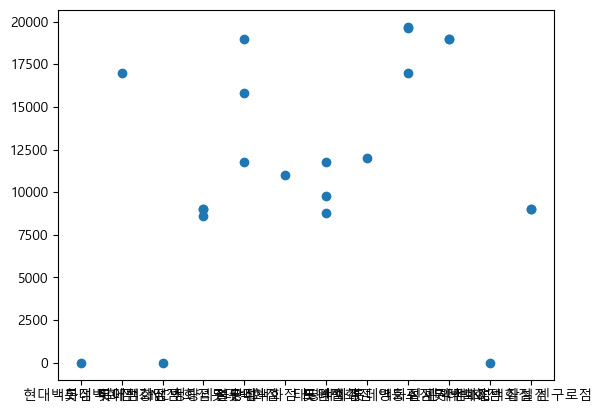

In [132]:
plt.scatter(df_egg_mart['시장/마트 이름'], df_egg_mart['가격(원)'])